In [30]:
import pandas as pd 
import numpy as np 

In [31]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [76]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [34]:
df.drop(columns=['Serial No.'],inplace=True)

In [43]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [67]:
y_train.shape

(320,)

In [68]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_scaled=mms.fit_transform(x_train)
x_test_scaled=mms.transform(x_test)

In [69]:
x_test_scaled

array([[0.22      , 0.42857143, 0.5       , 0.625     , 0.75      ,
        0.42307692, 1.        ],
       [0.42      , 0.35714286, 0.5       , 0.875     , 0.75      ,
        0.58974359, 1.        ],
       [1.        , 0.78571429, 1.        , 0.75      , 0.75      ,
        0.8974359 , 1.        ],
       [0.7       , 0.57142857, 0.75      , 0.875     , 0.75      ,
        0.72435897, 1.        ],
       [0.22      , 0.17857143, 0.25      , 0.5       , 0.5       ,
        0.34615385, 1.        ],
       [1.        , 0.82142857, 1.        , 0.875     , 0.875     ,
        0.84935897, 1.        ],
       [0.14      , 0.14285714, 0.25      , 0.375     , 0.125     ,
        0.34935897, 0.        ],
       [0.26      , 0.25      , 0.5       , 0.25      , 0.375     ,
        0.27564103, 0.        ],
       [0.44      , 0.46428571, 0.25      , 0.25      , 0.375     ,
        0.52884615, 0.        ],
       [0.66      , 0.75      , 0.5       , 0.75      , 0.5       ,
        0.80769231, 1. 

In [70]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(loss='mean_squared_error',optimizer="Adam")

In [73]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.7292 - val_loss: 0.7373
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6436 - val_loss: 0.6361
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5750 - val_loss: 0.5392
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4657 - val_loss: 0.4485
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4047 - val_loss: 0.3645
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3097 - val_loss: 0.2912
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2454 - val_loss: 0.2295
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1864 - val_loss: 0.1789
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1491 - val_loss: 0.1390
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1181 - val_loss: 0.1080


In [74]:
y_pred=model.predict(x_train_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [80, 320]

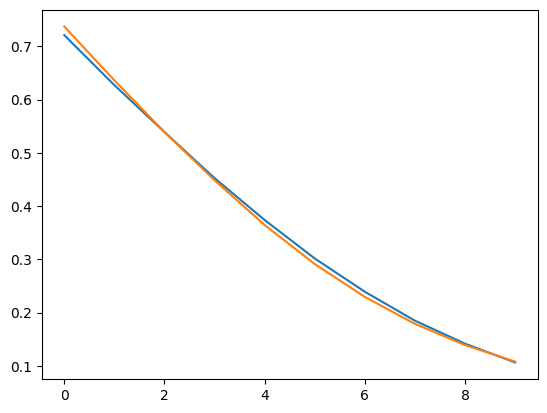

In [78]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])